<a href="https://colab.research.google.com/github/ShirazIsraeli/Anomly-Detection-In-Communication-Networks-/blob/main/Assignment%20II%20-%20NLP/Assignment_II_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1><font size=6>Assignment 2 : NLP : Seinfeld or Friends?</font></h1>

  <u>Group members:</u><br>
  - Ariel Hedvat<br>
  - Shiraz Israeli<br>
  - Yuval Bakirov<br>
  - Eitan Bakirov

<br>

This project aims to distinguish dialogue lines from the TV shows Seinfeld and Friends. The dataset includes dialogue text, character information, and show labels. The goal is to build a model trained on dialogue text and show labels, then evaluate its accuracy on a test set.
</div>


<div class="markdown-google-sans">
  <h1><font size=5>Data</font></h1>
</div>

`train.csv` and `test.csv` - TODO<br><br>

<div class="markdown-google-sans">
  <h1><font size=5>Table of Contents</font></h1>

>[Import Libraries](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=-_VBJ0JlYLKI)

>[Loading the data](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=kXwOL606ZfUN)

>[EDA - Exploring Data Analysis](#updateTitle=true&folderId=13--mVhc71hy_YO6feHv96bS47DWe0uh2&scrollTo=P8cTl07AZgyg)



#  Import Libraries

In [166]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from bs4 import BeautifulSoup
import re
from sklearn.preprocessing import LabelBinarizer

import nltk
from nltk.tokenize.toktok import ToktokTokenizer

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [167]:
# Data Loading for Train
url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/Assignment%20II%20-%20NLP/train.csv'
full_train_data = pd.read_csv(url)

#train_set = full_train_data.copy()
#x_train = full_train_data.drop('Show', axis=1).copy()
#y_train = full_train_data['Show'].copy()

In [168]:
# Data Loading for Test
url_test = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/Assignment%20II%20-%20NLP/test.csv'
full_test_data = pd.read_csv(url_test)

#test_set = full_test_data.copy()
#x_test = full_test_data.drop('Show', axis=1).copy()
#y_test = full_test_data['Show'].copy()

# **EDA & Pre- Processing**

In [169]:
full_train_data

Dialogue Character  \
0                                                   Hey.      joey   
1       (to Joey) Are you gonna be embarrassed going ...    phoebe   
2      Me? No no no, you. You're gonna tell him. I'm ...    elaine   
3       Alright you guys are off to party number one ...  chandler   
4      Am I? Or am I so sane that you just blew your ...    kramer   
...                                                  ...       ...   
70400                                       Pretty much.     jerry   
70401   Oh, well um, not right now. Y'know I’m just g...    phoebe   
70402                Ooh, I think I wanna trade circles.    phoebe   
70403      Hey, hey, what is this? What's going on here?     jerry   
70404                                I want the massage!     jerry   

                                                 Episode      Show  \
0         Season-07 Episode-13-The One Where Rosita Dies   Friends   
1             Season-10 Episode-04-The One With The Cake   Friends   
2                                                 S03E22  Seinfeld   
3      Season-02 Episode-22-The One With the Two Parties   Friends   
4                                                 S05E12  Seinfeld   
...                                                  ...       ...   
70400                                             S05E09  Seinfeld   
70401        Season-03 Episode-05-The One With Frank Jr.   Friends   
70402   Season-07 Episode-22-The One With Chandler’s Dad   Friends   
70403                                             S05E03  Seinfeld   
70404                                             S05E09  Seinfeld   

       Dialogue_length  
0                    1  
1                   13  
2                   14  
3                   56  
4                   13  
...                ...  
70400                2  
70401               22  
70402                7  
70403                9  
70404                4  

[70405 rows x 5 columns]

In [170]:
# Cheking if there are Missing Values
missing_values_count = full_train_data.isnull().sum()
print("Missing values count per column in train data:")
print(missing_values_count)
missing_values_count = full_test_data.isnull().sum()
print("Missing values count per column in test data:")
print(missing_values_count)



Missing values count per column in train data:
Dialogue           0
Character          0
Episode            0
Show               0
Dialogue_length    0
dtype: int64
Missing values count per column in test data:
Dialogue           0
Character          0
Episode            0
Show               0
Dialogue_length    0
dtype: int64


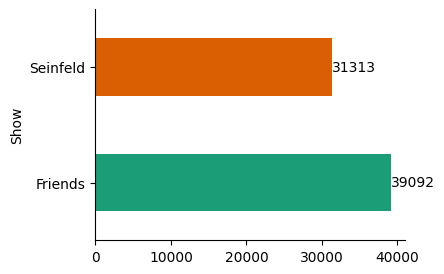

In [171]:
# Grouping by 'Show' and getting size
grouped_data = full_train_data.groupby('Show').size()

plt.figure(figsize=(4, 3))  # Adjust width and height as needed

# Plotting the grouped data
ax = grouped_data.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding count numbers near the plots
for i, count in enumerate(grouped_data):
    ax.text(count + 0.1, i, str(count), va='center')  # Adjust 0.1 to place the number slightly away from the bar

plt.show()

In [172]:
full_train_data.iloc[1, 0]

' (to Joey) Are you gonna be embarrassed going up there having nothing prepared?'

In [173]:
df = full_train_data

In [174]:
# Define a function to plot histogram with count numbers
def plot_histogram_with_counts(ax, data, title, xlabel, ylabel, color):
    bars = ax.bar(data.index, data.values, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(data.index)
    ax.set_xticklabels(data.index, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # Adding count numbers above each column
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')


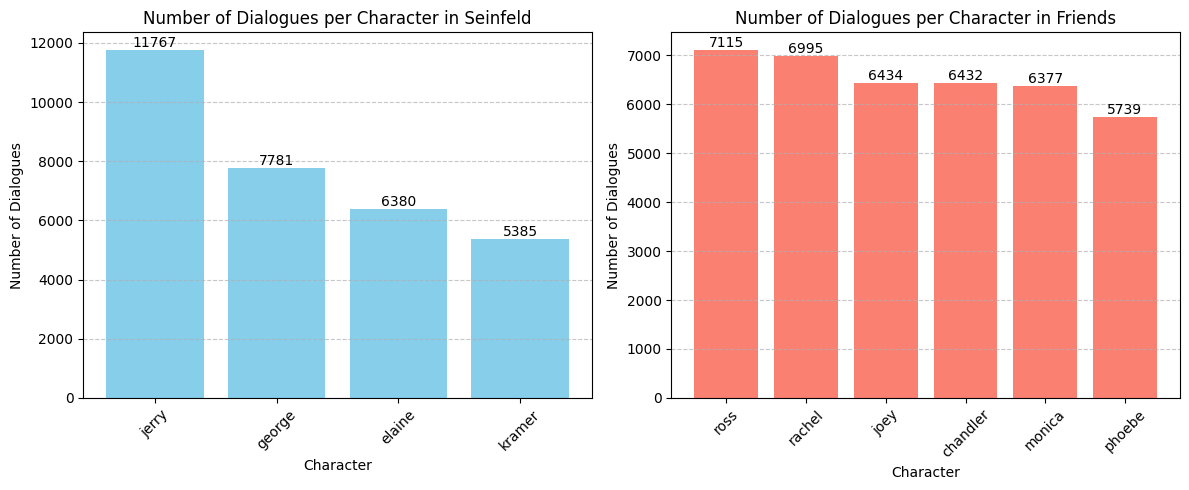

In [175]:
# Filter data for Seinfeld
seinfeld_df = df[df['Show'] == 'Seinfeld']
# Group by character and count dialogues
seinfeld_character_counts = seinfeld_df['Character'].value_counts()

# Filter data for Friends
friends_df = df[df['Show'] == 'Friends']
# Group by character and count dialogues
friends_character_counts = friends_df['Character'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for Seinfeld
plot_histogram_with_counts(axes[0], seinfeld_character_counts, 'Number of Dialogues per Character in Seinfeld', 'Character', 'Number of Dialogues', 'skyblue')

# Plot histogram for Friends
plot_histogram_with_counts(axes[1], friends_character_counts, 'Number of Dialogues per Character in Friends', 'Character', 'Number of Dialogues', 'salmon')

plt.tight_layout()
plt.show()

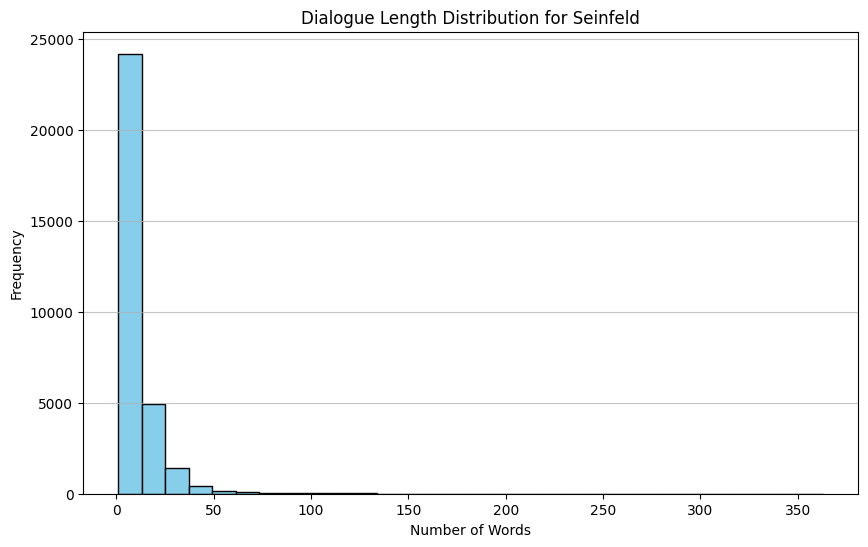

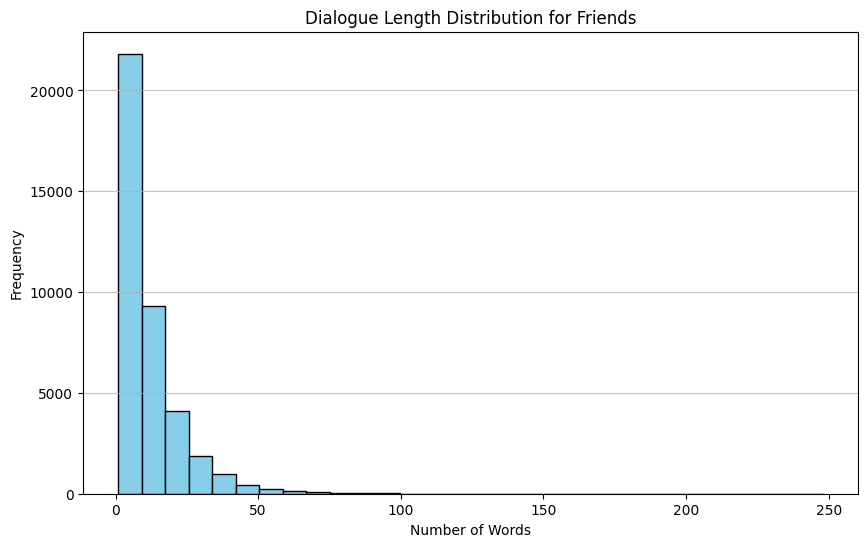

In [176]:
# Dialogues Length Distribution
# Plotting the distribution of dialogue lengths for each show to understand the typical length of dialogues

def plot_dialogue_length_distribution(data, show_name):
    show_data = data[data['Show'] == show_name]
    dialogue_lengths = show_data['Dialogue'].apply(lambda x: len(x.split()))

    plt.figure(figsize=(10, 6))
    plt.hist(dialogue_lengths, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Dialogue Length Distribution for {show_name}')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Example usage
plot_dialogue_length_distribution(full_train_data, 'Seinfeld')
plot_dialogue_length_distribution(full_train_data, 'Friends')


In [177]:
def count_words_custom(col):
    # Create an empty dictionary to store word counts
    word_counts = {}

    # Iterate over each row in the column
    for row in col:
        # Convert dialogue to lowercase and split into words
        words = row.lower().split()

        # Iterate over each word in the row
        for word in words:
            # Update word count dictionary
            word_counts[word] = word_counts.get(word, 0) + 1

    # Sort word counts by value in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract top 20 words and their counts
    top_words = [word for word, count in sorted_word_counts[:20]]
    top_counts = [count for word, count in sorted_word_counts[:20]]

    # Plot bar chart
    plt.figure(figsize=(15, 5))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 20 Most Common Words')
    plt.xticks(rotation=45)
    plt.show()

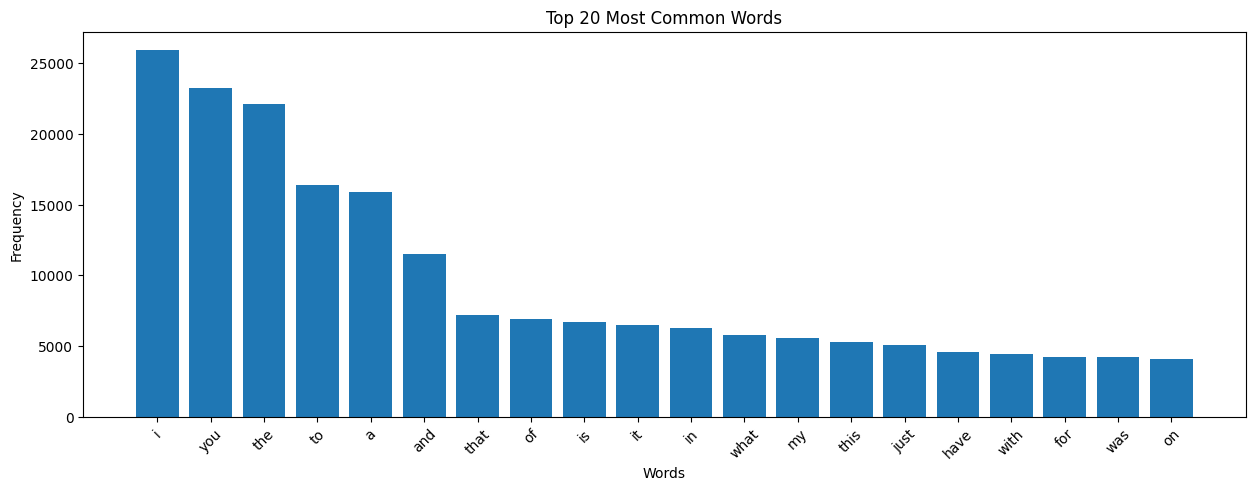

In [178]:
count_words_custom(df['Dialogue'])

We can see that all the most common words are Stop Words. We want to see the frequency without them.

For that we will implement data preprocessing steps:

## Text Cleaning

In [179]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [180]:
# Removing the noisy text
# TODO if only one func is called here so there is no need for this function
def clean_text(text):
    # text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [181]:
# Apply function on 'Dialogue' column
df['Dialogue'] = df['Dialogue'].apply(clean_text)

In [182]:
df.iloc[1, 0]

' (to Joey) Are you gonna be embarrassed going up there having nothing prepared?'

## Special character removal

In [183]:
# Define function for removing special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [184]:
# Apply function on Dialogue column
df['Dialogue'] = df['Dialogue'].apply(remove_special_characters)

In [185]:
df.iloc[1, 0]

' to Joey Are you gonna be embarrassed going up there having nothing prepared'

## Stop words removal

We will use the NLTK in order to find all the English stop words and take a look at a few of them:

In [186]:
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
print('Number of English stop words:', len(stopword_list))
print(stopword_list[:5])

Number of English stop words: 179
['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
#Removing the stop words using tokenization
tokenizer = ToktokTokenizer()
tokenizer.tokenize(df.iloc[1, 0])

['to',
 'Joey',
 'Are',
 'you',
 'gonna',
 'be',
 'embarrassed',
 'going',
 'up',
 'there',
 'having',
 'nothing',
 'prepared']

In [188]:
# Adding a progress bar to the output
tqdm.pandas()

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [189]:
# Apply function on Dialogue column
df['Dialogue'] = df['Dialogue'].progress_apply(remove_stopwords)

  0%|          | 0/70405 [00:00<?, ?it/s]

In [190]:
df.iloc[1, 0]

'Joey gonna embarrassed going nothing prepared'

Now we can run the word count again and see the desired plotting:

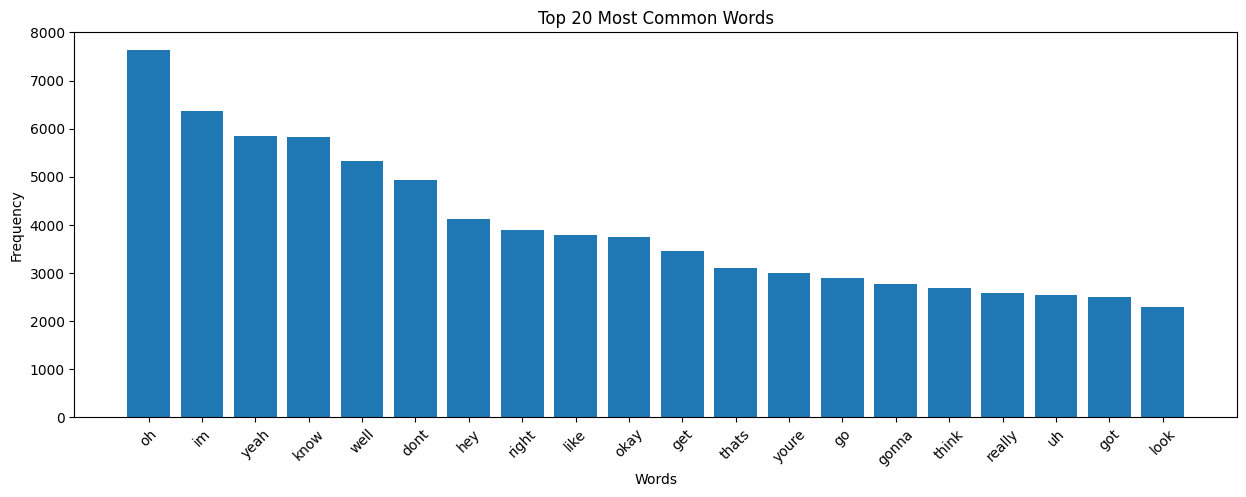

In [191]:
count_words_custom(df['Dialogue'])

## Stemming

In [192]:
# Stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
# Apply function on Dialogue column
df['Dialogue'] = df['Dialogue'].progress_apply(simple_stemmer)

  0%|          | 0/70405 [00:00<?, ?it/s]

In [193]:
df.iloc[1, 0]

'joey gonna embarrass go noth prepar'

## Train-test-valdiation split

In [194]:
X_train = full_train_data['Dialogue']
X_test = full_test_data['Dialogue']
y_train = full_train_data['Show']
y_test = full_test_data['Show']

In [195]:
# Train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('x_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)



x_train shape: (56324,)
y_train shape: (56324,)
x_test shape: (4245,)
y_test shape: (4245,)
x_val shape: (14081,)
y_val shape: (14081,)


## Labeling

In [196]:
unique_shows = full_train_data['Show'].unique()
print("Unique values in the 'show' column:")
print(unique_shows)


Unique values in the 'show' column:
['Friends' 'Seinfeld']


In [197]:
# as we saw above - we have only 2 values in 'Show' columns : Friends and Seindfeld
# Therefore we will change our lable into binary numbers : Seinfeld = 0 , Friends = 1
custom_labels = ['Seinfeld', 'Friends']
# Initialize LabelBinarizer
lb = LabelBinarizer()
# Fit and transform custom labels
binary_labels = lb.fit_transform(custom_labels)

print(binary_labels)

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
y_val = lb.transform(y_val)

[[1]
 [0]]


## Bag Of Words

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')

x_train_cv = cv.fit_transform(X_train)
x_test_cv = cv.transform(X_test)
x_val_cv = cv.transform(X_val)

print('x_train_cv:', x_train_cv.shape)
print('x_test_cv:', x_test_cv.shape)
print('x_val_cv:', x_val_cv.shape)

x_train_cv: (56324, 15684)
x_test_cv: (4245, 15684)
x_val_cv: (14081, 15684)


And now each sample is a sparse Numpy matrix:

In [203]:
x_train_cv[0]

<1x15684 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [204]:
print(x_train_cv[0])

  (0, 14081)	1
  (0, 6411)	1
  (0, 6542)	1
  (0, 13333)	1
  (0, 4698)	1
  (0, 3750)	1
  (0, 2177)	1
  (0, 5303)	1
  (0, 5277)	1
  (0, 4438)	1
  (0, 3342)	1


### TF-IDF


This is another way to convert the data to a numerical format. Like BoW, this algorithm is based on a term's popularity. However, its score is negatively correlated with its popularity in all documents.

This time we're going to use only 5K different terms as a cut-off.

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(analyzer='word', max_features=5000)

x_train_tv = tv.fit_transform(X_train)
x_test_tv = tv.transform(X_test)
x_val_tv = tv.transform(X_val)

print('x_train_tv:', x_train_tv.shape)
print('x_test_tv:', x_test_tv.shape)
print('x_val_tv:', x_val_tv.shape)

x_train_tv: (56324, 5000)
x_test_tv: (4245, 5000)
x_val_tv: (14081, 5000)


Once again we have a sparse matrix:

In [206]:
x_train_tv[0]

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

Containing continuous values between [0, 1]:

In [209]:
print(x_train_tv[0])

  (0, 1090)	0.3165482893435794
  (0, 1458)	0.33572009568572775
  (0, 1767)	0.1865560938067702
  (0, 1776)	0.3587129813643708
  (0, 668)	0.29888255536173175
  (0, 1228)	0.2789183923985307
  (0, 1561)	0.3882030345020757
  (0, 4368)	0.23179916421698069
  (0, 2149)	0.24041140685362405
  (0, 2118)	0.3496332452602705
  (0, 4594)	0.2683491530600496
